In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [11]:
# Read data
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")[['v1', 'v2']]
df.columns = ['label', 'text']
print(df)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


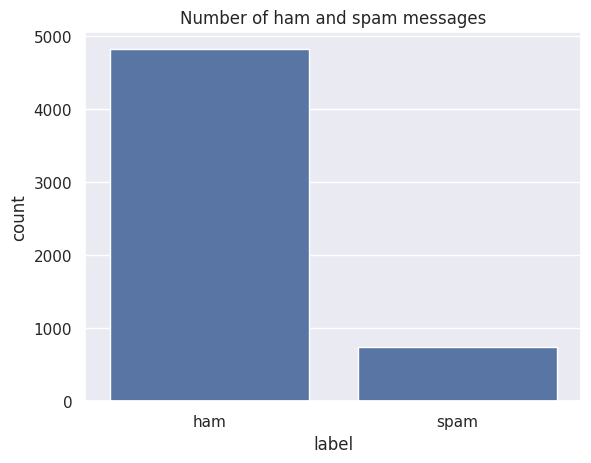

In [12]:
# Calculate the ham/spam count
#df.groupby('label').describe()
df.info()
sb.set()
sb.countplot(data = df, x= df["label"]).set_title("Number of ham and spam messages")
plt.show()

In [4]:
# TODO: Use CountVectorizer to convert training and testing data into a matrix (based on train data)¶
# Step 1: Split data into Train and test data (70%/30%)
# Step 2: Fit the CountVectorizer with the training data such that we know the vocabulary.
#         Moreover, we count how frequently a word has been used. This will be used in the Multinomial naive bayes.
# Step 3: Transform the training and testing dataset into two separate matrices.
#         (One new column for every word in the messages and counts how often they have been used in each message)

# Step 1: Randomly split the data (Hint: Use "train_test_split" at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],train_size=0.7,test_size=0.3)

# Step 2: Fit the CountVectorizer (Hint: Check the example at https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)   
count_vectorizer = CountVectorizer()

# Step 3: Transform the training and testing dataset into two separate matrices (Hint: Check https://scikit-learn.org/0.15/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)
training_data = count_vectorizer.fit_transform(X_train)
testing_data = count_vectorizer.transform(X_test)

In [5]:
# TODO: Use MultinomialNB() to train a spam filter with the training dataset X_train, y_train
# Hint: Check the example at https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html
model = MultinomialNB()
model.fit(training_data, y_train)

MultinomialNB()

In [9]:
# TODO: Test the spam filter by using the testing dataset X_test, y_test
accuracy = model.score(testing_data, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9886363636363636
